# Customer Churn Analysis

# Project Description

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

In [1]:
#importing basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:

#Loading the dataset given
import requests
import pandas as pd

df = pd.read_csv('Telecom_customer_churn.csv')

In [3]:
#first few rows of the dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#shape of the dataset
df.shape

(7043, 21)

In [5]:
#columns in the dataset
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
#data types of all the features of the datset
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
#checking for missing values in the dataset
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Total charges column has 11 null values

In [12]:
#We can drop the customer ID, as it is irrevelant to the analysis (as unique number for each customer)
df.drop(["customerID"],axis=1,inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


customerID column is dropped

In [13]:
df.duplicated().any()

True

In [15]:
# Check if there are any duplicate rows
if df.duplicated().any():
    # Remove duplicate rows
    df.drop_duplicates(inplace=True)
    print("Duplicate rows removed.")
else:
    print("No duplicate rows found.")

Duplicate rows removed.


In [16]:
df.duplicated().any()

False

In [17]:
df.isin(['NAN','NA','N/A','-',' ','?','--']).sum().any()

False

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16  PaymentMethod     7021 non-null   object 


In [27]:
#unique data in gender column
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [28]:
#unique data in SeniorCitizen column
df['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [29]:
#unique data in Partner column
df['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [30]:
#unique data in Dependents column
df['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

In [32]:
#unique data in tenure column
df['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

In [33]:
#unique data in PhoneService column
df['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

In [34]:
#unique data in MultipleLines column
df['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [35]:
#unique data in InternetService column
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [36]:
#unique data in OnlineSecurity column
df['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [37]:
#unique data in OnlineBackup column
df['OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [38]:
#unique data in DeviceProtection column
df['DeviceProtection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [40]:
#unique data in TechSupport column
df['TechSupport'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [46]:
for i in df.columns:
    if df[i].dtypes == "object":
        print("Unique values in the column ",i," are: ")
        print(df[i].unique())
        print("=="*45)
#    else:
#       return

Unique values in the column  gender  are: 
['Female' 'Male']
Unique values in the column  Partner  are: 
['Yes' 'No']
Unique values in the column  Dependents  are: 
['No' 'Yes']
Unique values in the column  PhoneService  are: 
['No' 'Yes']
Unique values in the column  MultipleLines  are: 
['No phone service' 'No' 'Yes']
Unique values in the column  InternetService  are: 
['DSL' 'Fiber optic' 'No']
Unique values in the column  OnlineSecurity  are: 
['No' 'Yes' 'No internet service']
Unique values in the column  OnlineBackup  are: 
['Yes' 'No' 'No internet service']
Unique values in the column  DeviceProtection  are: 
['No' 'Yes' 'No internet service']
Unique values in the column  TechSupport  are: 
['No' 'Yes' 'No internet service']
Unique values in the column  StreamingTV  are: 
['No' 'Yes' 'No internet service']
Unique values in the column  StreamingMovies  are: 
['No' 'Yes' 'No internet service']
Unique values in the column  Contract  are: 
['Month-to-month' 'One year' 'Two year']
Un

In [23]:
# Display only the rows with null values
null_rows = df[df.isnull().any(axis=1)]
print(null_rows)

      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female              0     Yes        Yes       0           No   
753     Male              0      No        Yes       0          Yes   
936   Female              0     Yes        Yes       0          Yes   
1082    Male              0     Yes        Yes       0          Yes   
1340  Female              0     Yes        Yes       0           No   
3331    Male              0     Yes        Yes       0          Yes   
3826    Male              0     Yes        Yes       0          Yes   
4380  Female              0     Yes        Yes       0          Yes   
5218    Male              0     Yes        Yes       0          Yes   
6670  Female              0     Yes        Yes       0          Yes   
6754    Male              0      No        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
488   No phone service             DSL                  Yes   
753                 N

In [24]:
#Replacing the null values im the TotalCharges column with the column mean
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16  PaymentMethod     7021 non-null   object 


There arw no null values in the data set

<AxesSubplot:>

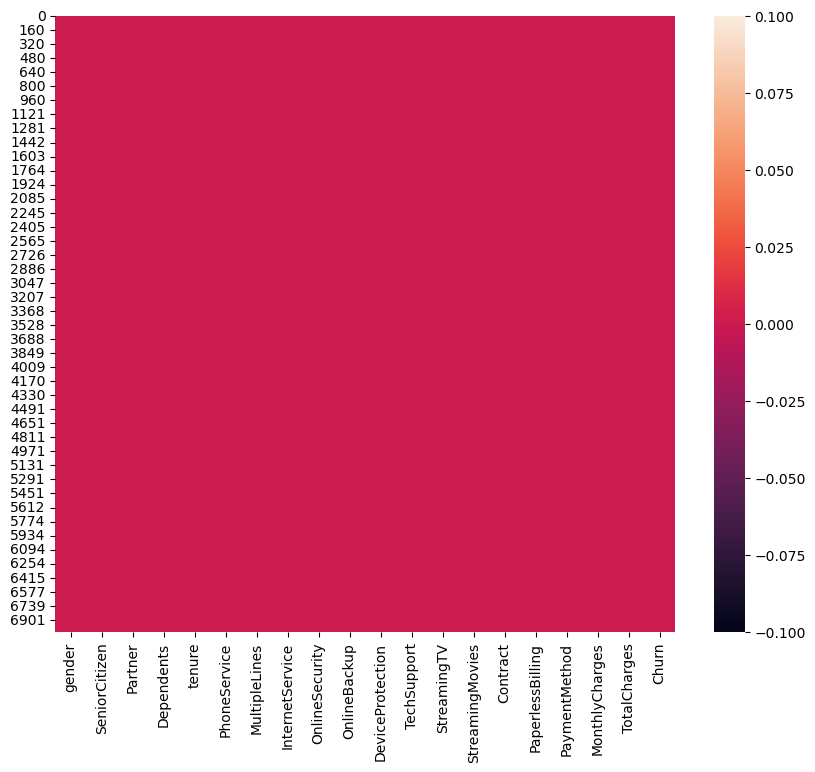

In [26]:
#heat map for dataset null values
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull())

# Data Visualisations

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

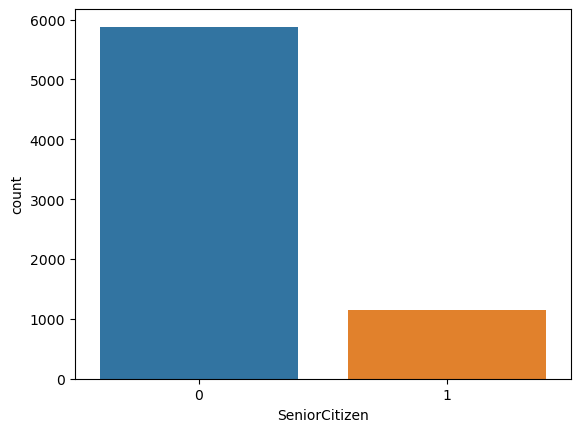

In [48]:
#bar plot for 'SeniorCitizen' feature
sns.countplot(x='SeniorCitizen',data=df)

<AxesSubplot:xlabel='gender', ylabel='count'>

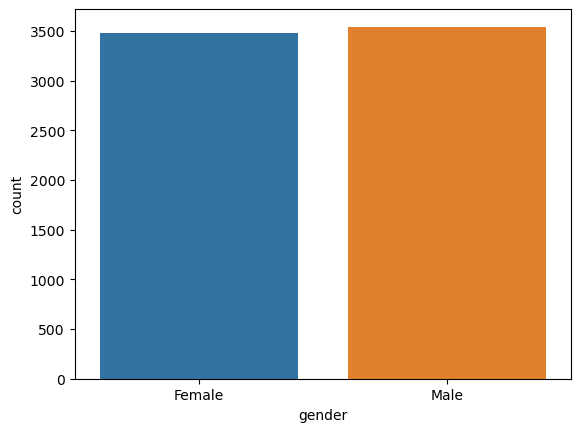

In [49]:
#bar plot for 'gender' feature
sns.countplot(x='gender',data=df)

<AxesSubplot:xlabel='Partner', ylabel='count'>

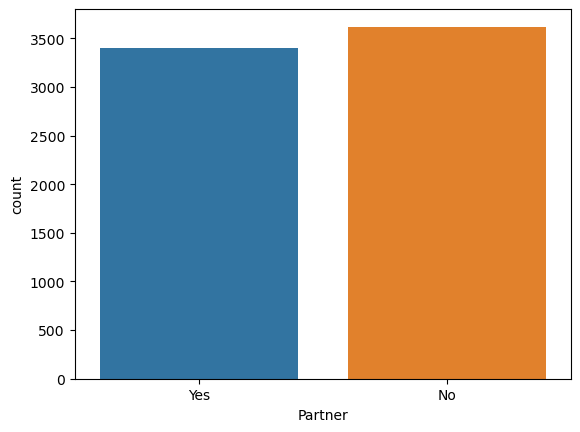

In [50]:
#bar plot for 'Partner' feature
sns.countplot(x='Partner',data=df)

In [51]:
#unique data in TotalCharges column
df['TotalCharges'].nunique()

6531

Count plot for  gender : 


<Figure size 500x300 with 0 Axes>

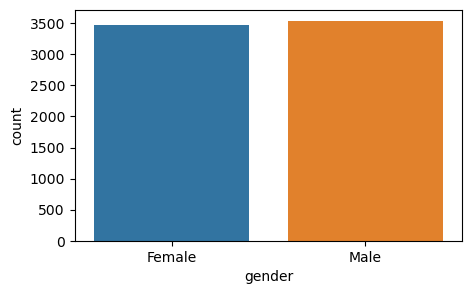

Count plot for  Partner : 


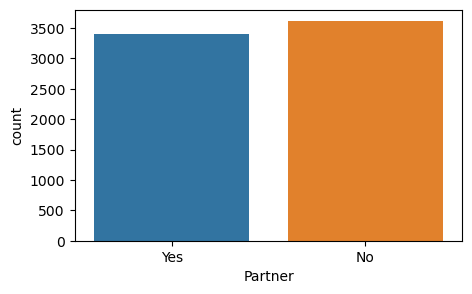

Count plot for  Dependents : 


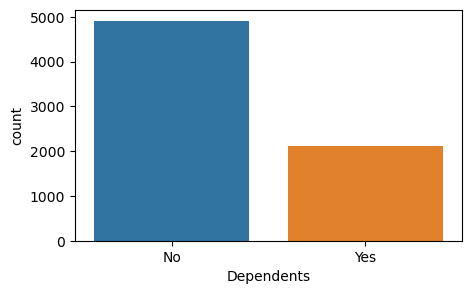

Count plot for  PhoneService : 


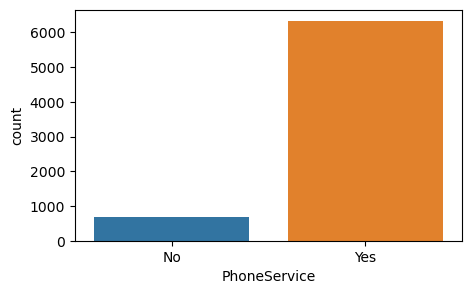

Count plot for  MultipleLines : 


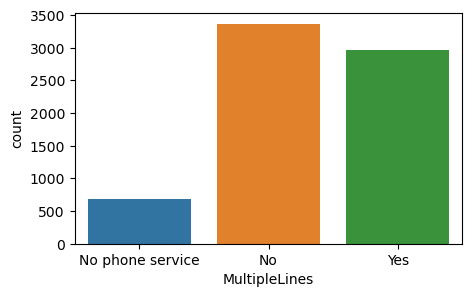

Count plot for  InternetService : 


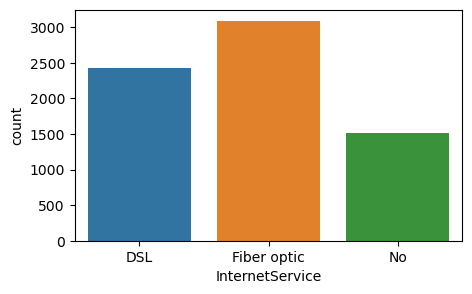

Count plot for  OnlineSecurity : 


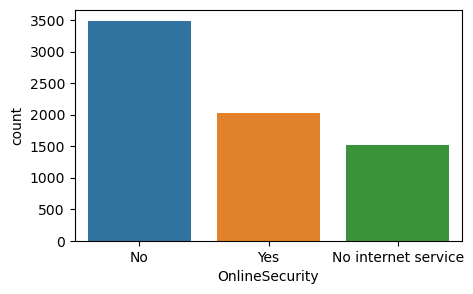

Count plot for  OnlineBackup : 


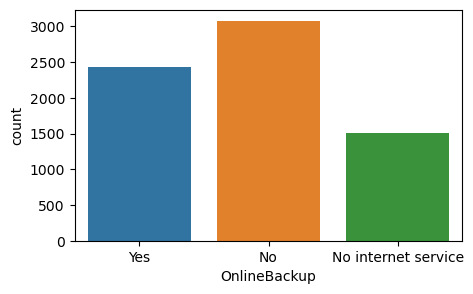

Count plot for  DeviceProtection : 


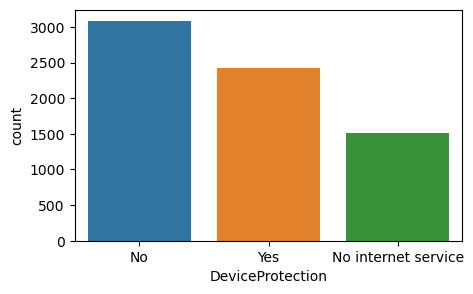

Count plot for  TechSupport : 


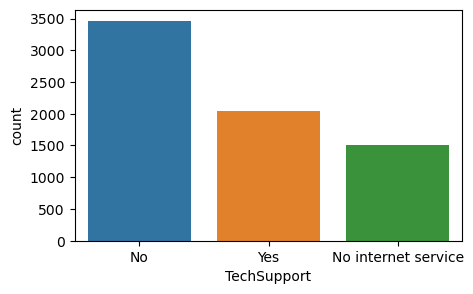

Count plot for  StreamingTV : 


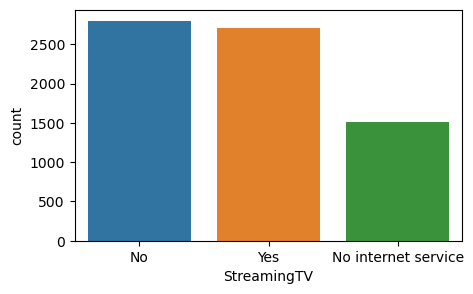

Count plot for  StreamingMovies : 


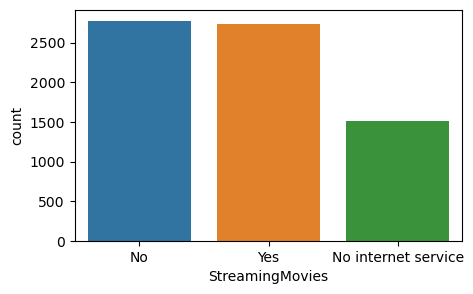

Count plot for  Contract : 


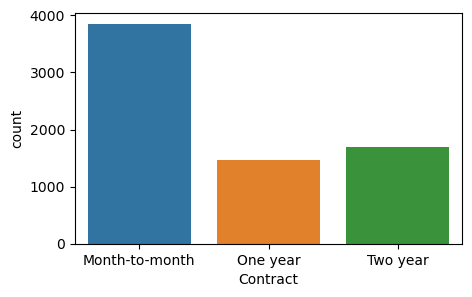

Count plot for  PaperlessBilling : 


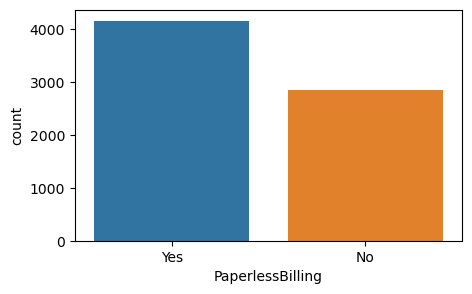

Count plot for  PaymentMethod : 


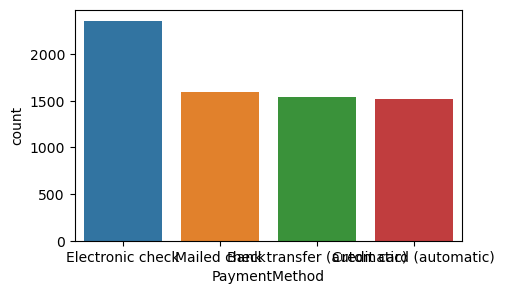

Count plot for  Churn : 


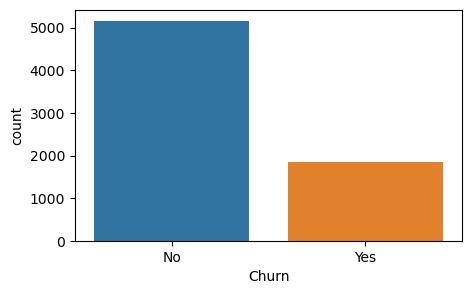

In [56]:
plt.figure(figsize=(5,3))
for i in df.columns:
    if df[i].dtypes == "object":
        print("Count plot for ",i,": ")
        plt.figure(figsize=(5,3))
        sns.countplot(x=i,data=df)
        print("=="*45)
        plt.show()
    

# Gender vs Churn

<AxesSubplot:xlabel='gender', ylabel='count'>

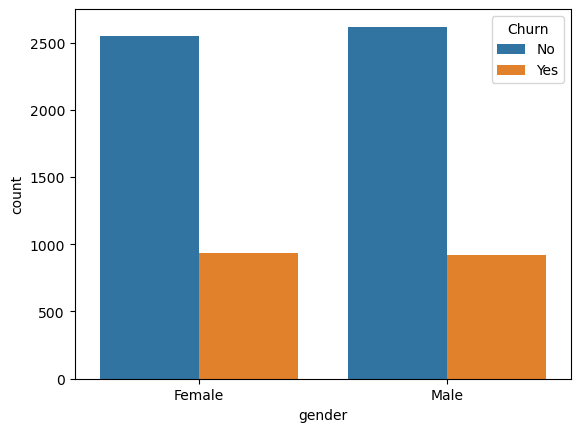

In [57]:
#bar plot for 'gender vs churn' feature
sns.countplot(x='gender',hue='Churn',data=df)

# SeniorCitizen vs churn

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

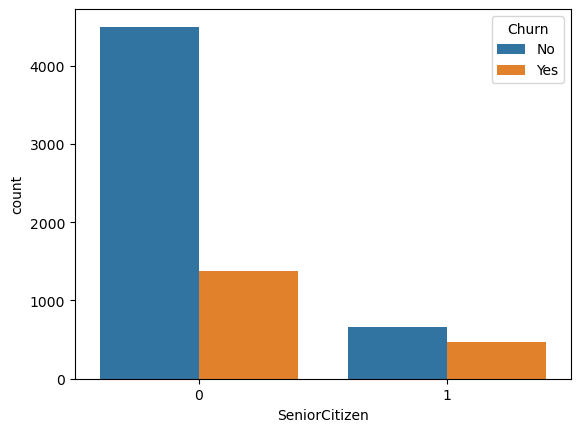

In [58]:
#bar plot for 'SeniorCitizen vs churn' feature
sns.countplot(x='SeniorCitizen',hue='Churn',data=df)

<AxesSubplot:xlabel='Partner', ylabel='count'>

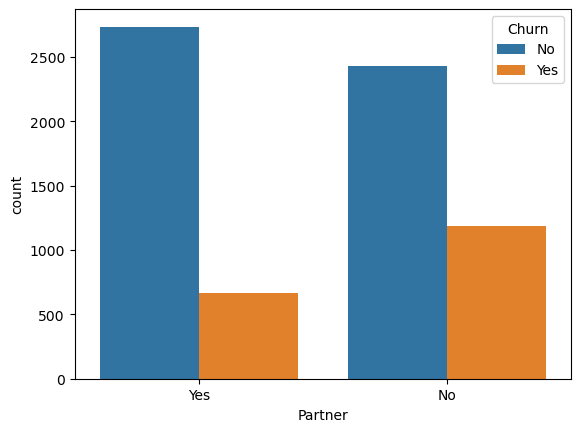

In [59]:
#bar plot for 'Partner vs churn' feature
sns.countplot(x='Partner',hue='Churn',data=df)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

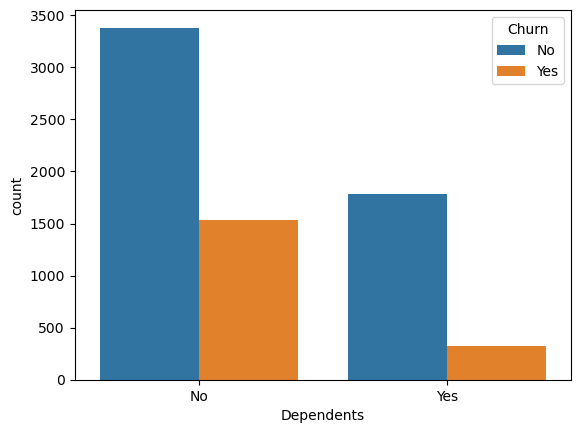

In [60]:
#bar plot for 'Dependents vs churn' feature
sns.countplot(x='Dependents',hue='Churn',data=df)

Count plot for  gender vs Churn: 


<Figure size 500x300 with 0 Axes>

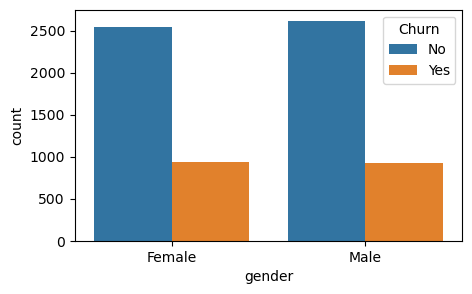

Count plot for  Partner vs Churn: 


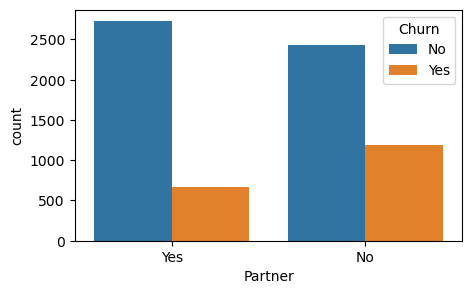

Count plot for  Dependents vs Churn: 


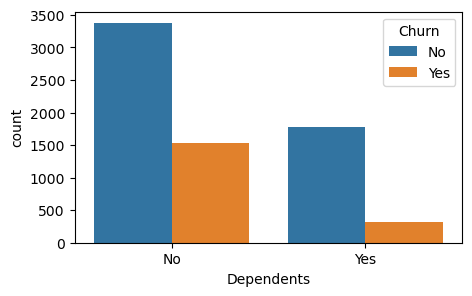

Count plot for  PhoneService vs Churn: 


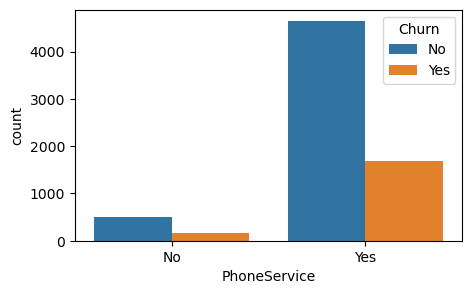

Count plot for  MultipleLines vs Churn: 


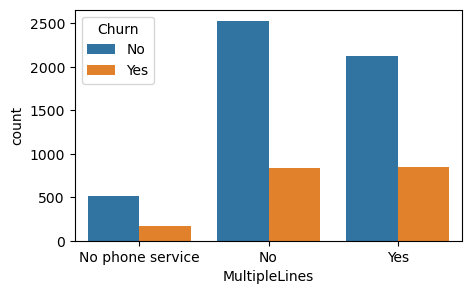

Count plot for  InternetService vs Churn: 


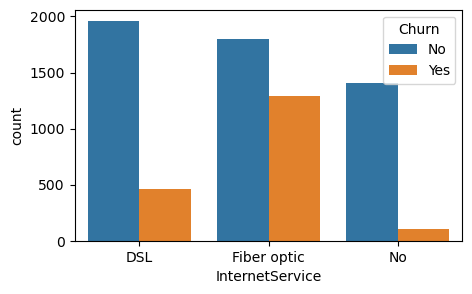

Count plot for  OnlineSecurity vs Churn: 


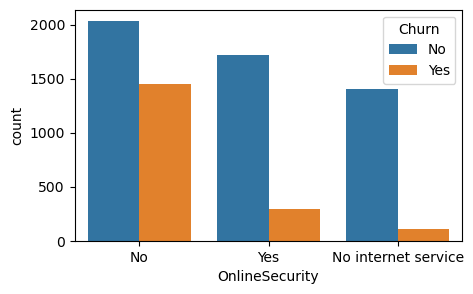

Count plot for  OnlineBackup vs Churn: 


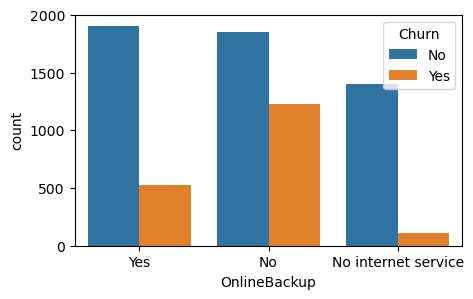

Count plot for  DeviceProtection vs Churn: 


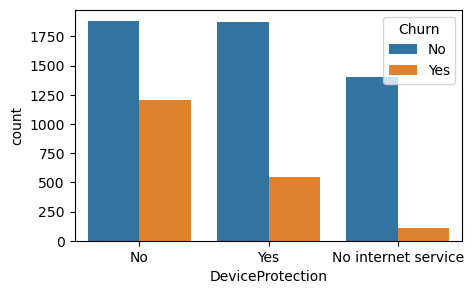

Count plot for  TechSupport vs Churn: 


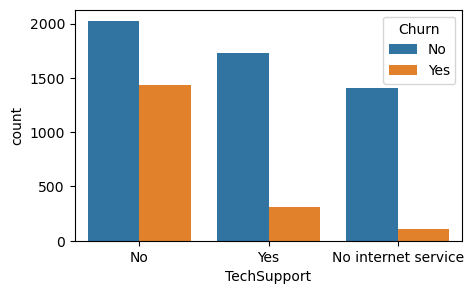

Count plot for  StreamingTV vs Churn: 


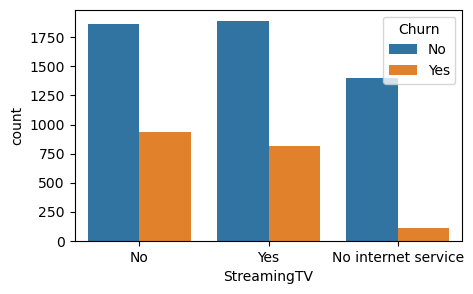

Count plot for  StreamingMovies vs Churn: 


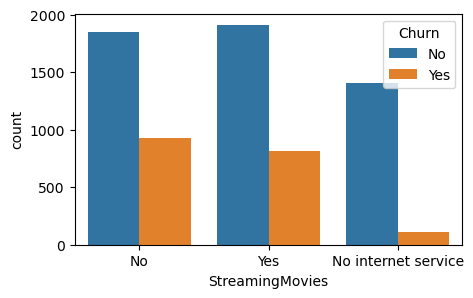

Count plot for  Contract vs Churn: 


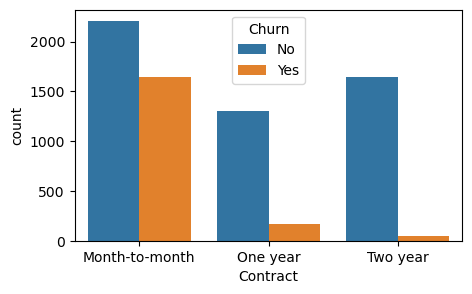

Count plot for  PaperlessBilling vs Churn: 


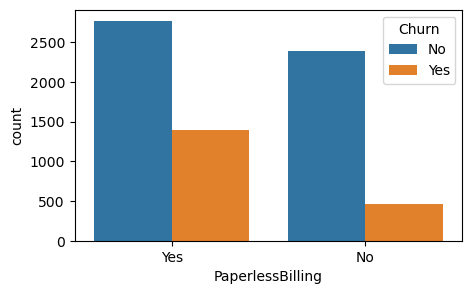

Count plot for  PaymentMethod vs Churn: 


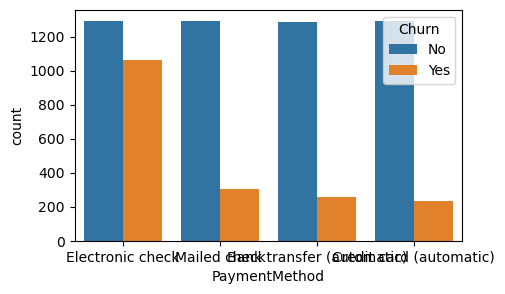

Count plot for  Churn vs Churn: 


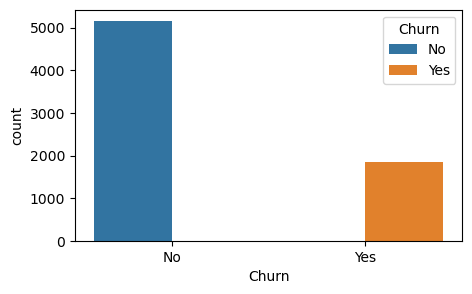

In [61]:
plt.figure(figsize=(5,3))
for i in df.columns:
    if df[i].dtypes == "object":
        print("Count plot for ",i,"vs Churn: ")
        plt.figure(figsize=(5,3))
        sns.countplot(x=i,hue="Churn",data=df)
        print("=="*45)
        plt.show()

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Churn'>

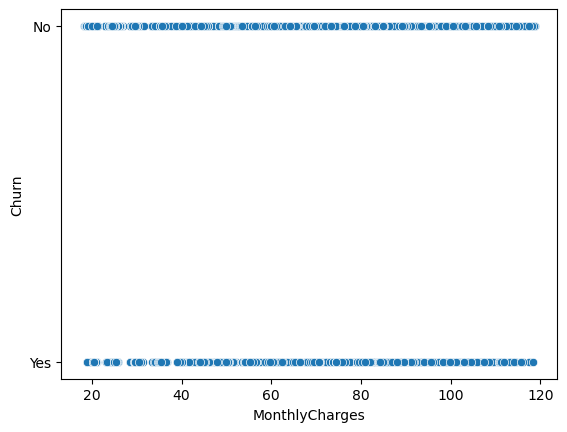

In [63]:
#bar plot for 'MonthlyCharges vs churn' feature
sns.scatterplot(x='MonthlyCharges',y='Churn',data=df)

<AxesSubplot:xlabel='TotalCharges', ylabel='Churn'>

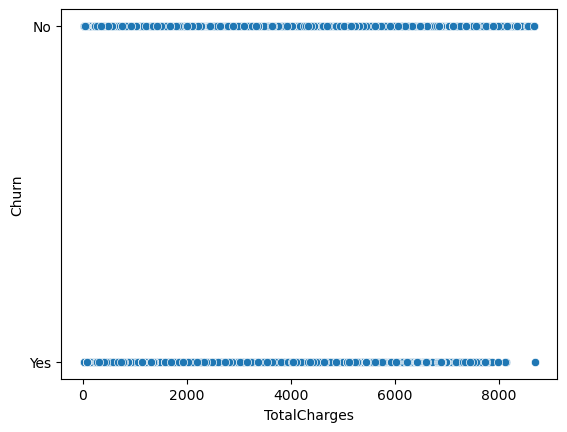

In [65]:
#bar plot for 'MonthlyCharges vs churn' feature
sns.scatterplot(x='TotalCharges',y='Churn',data=df)

<AxesSubplot:xlabel='TotalCharges', ylabel='MonthlyCharges'>

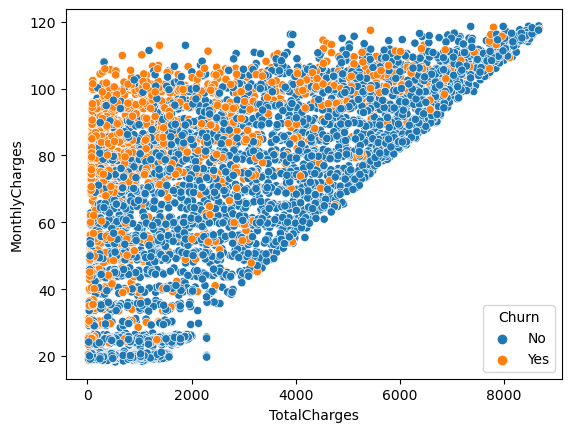

In [66]:
#bar plot for 'MonthlyCharges vs churn' feature
sns.scatterplot(x='TotalCharges',y='MonthlyCharges',hue="Churn",data=df)

<AxesSubplot:>

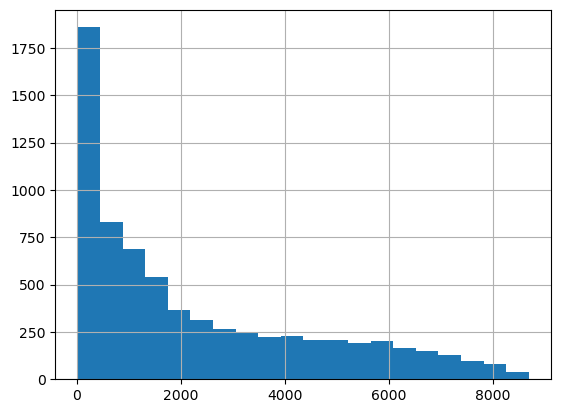

In [70]:
#histogram
df['TotalCharges'].hist(bins = 20)

There arevrelatively equal proportion of male and female customers. Almost half of the customers in our dataset are female whilst the other half are male.

Most of the customers in the dataset are younger people.

Almost half of the customers have a partner.

a lot of new customers in the organization (less than 10 months old) followed by a loyal customers that stays for more than 70 months on average.

A huge proportion of customers on $20 segment of total charges.

Most of the customers have phone service out of which almost half of the customers have multiple lines.

Customers who have availed Online Backup, Device Protection, Technical Support and Online Security features are a minority.

Customers of month to month/ prepaid contract has more probabbility to churn than other contract types

Cusomers with bank trasfer payment method has low chances of churn, compared to other payment methods

# Checking for Outliers

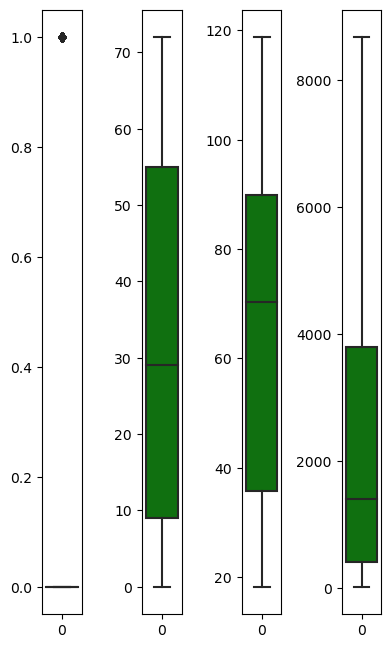

In [76]:
# checking with Boxplots
ncol=30
nrows=14
col = ["SeniorCitizen","tenure","MonthlyCharges","TotalCharges"]
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(col)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data=df[col[i]],color='green',orient='v')
    plt.tight_layout()

As the senior citizen column having outliers, which is of categorical column, no need to remove the outliers

# Categorical Columns data Encoding

In [77]:
from sklearn.preprocessing import OrdinalEncoder
Enc=OrdinalEncoder()

In [80]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=Enc.fit_transform(df[i].values.reshape(-1,1))

In [81]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,0.0
7039,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90,0.0
7040,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,346.45,0.0
7041,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1.0


In [82]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000
mean,0.504344,0.162512,0.484546,0.300527,32.469449,0.902863,0.943455,0.870816,0.790486,0.907278,0.905284,0.797607,0.986469,0.993591,0.692636,0.592651,1.570716,64.851894,2290.353388,0.264492
std,0.500017,0.368947,0.499797,0.458520,24.534965,0.296166,0.948575,0.737076,0.860730,0.880999,0.880787,0.862432,0.885762,0.885842,0.834163,0.491376,1.067530,30.069001,2265.044136,0.441094
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.750000,411.150000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.400000,1410.250000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.900000,3801.700000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


<AxesSubplot:>

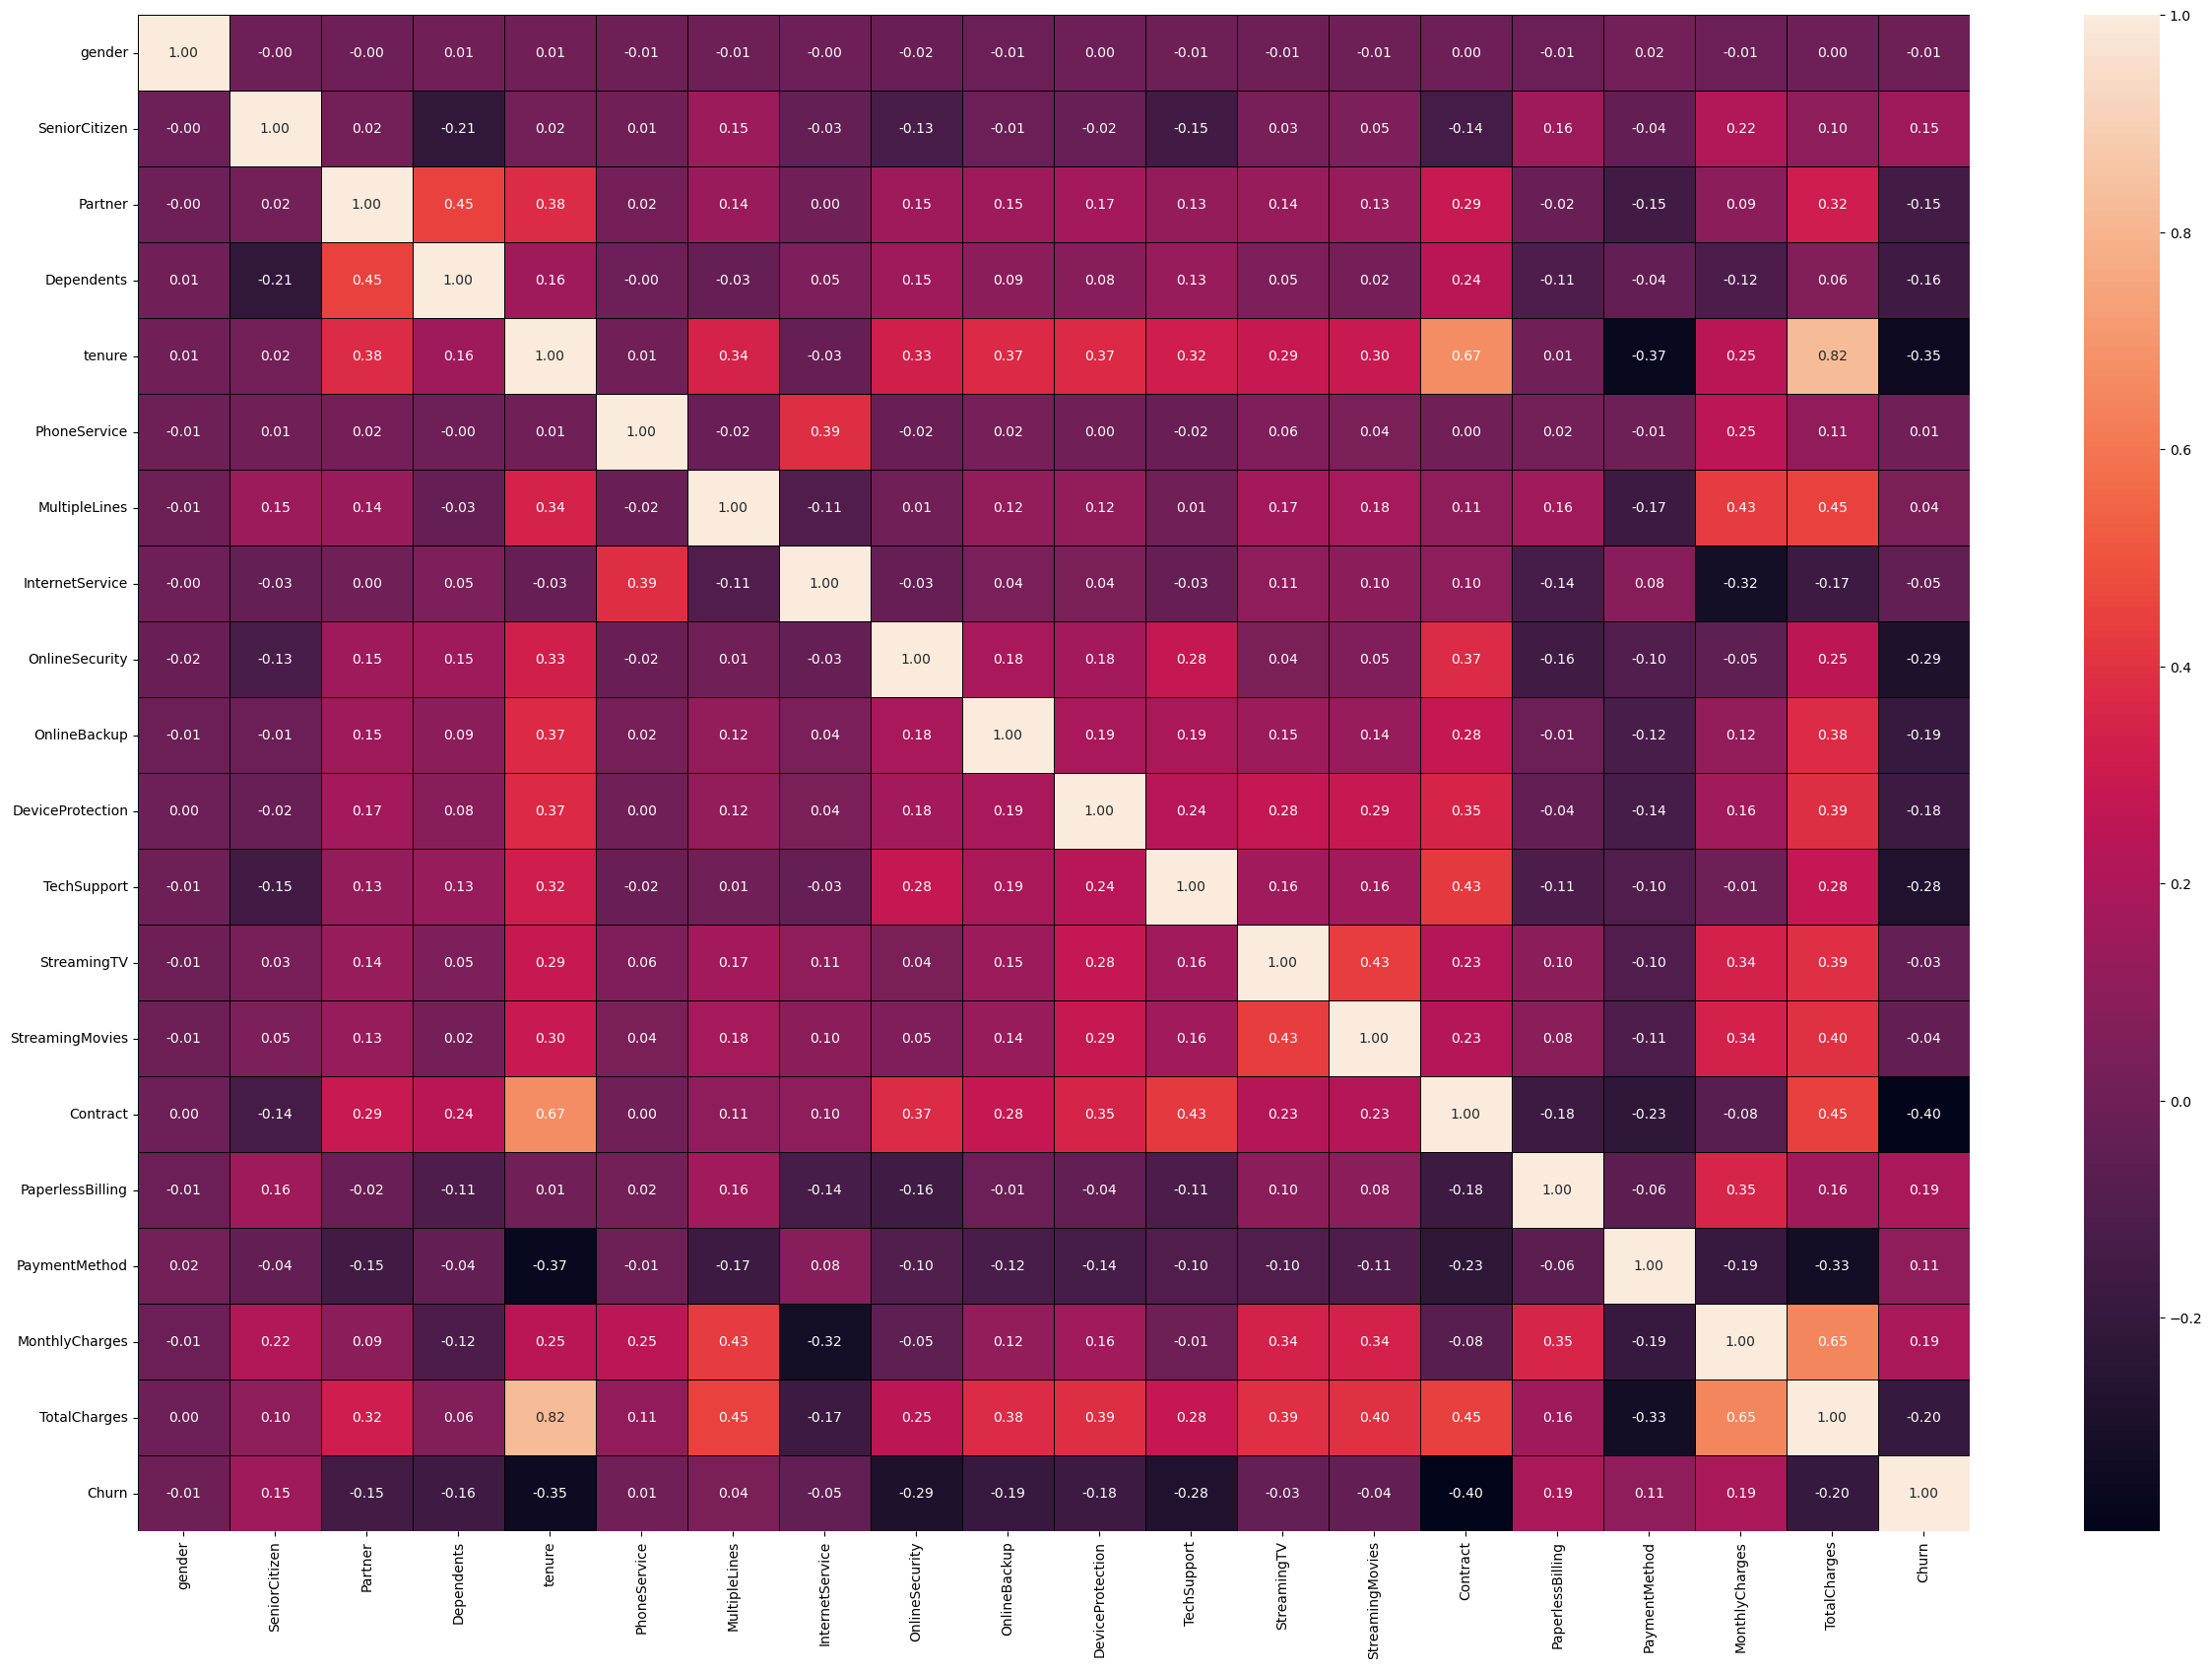

In [84]:
# heat map for correaltion

plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,linecolor='black',fmt='0.2f')

In [86]:
df.corr()["Churn"].sort_values()

Contract           -0.396531
tenure             -0.351508
OnlineSecurity     -0.288505
TechSupport        -0.281654
TotalCharges       -0.198306
OnlineBackup       -0.194214
DeviceProtection   -0.176770
Dependents         -0.163459
Partner            -0.149135
InternetService    -0.047366
StreamingMovies    -0.036492
StreamingTV        -0.034591
gender             -0.008763
PhoneService        0.011323
MultipleLines       0.040175
PaymentMethod       0.106238
SeniorCitizen       0.151619
PaperlessBilling    0.190891
MonthlyCharges      0.194508
Churn               1.000000
Name: Churn, dtype: float64

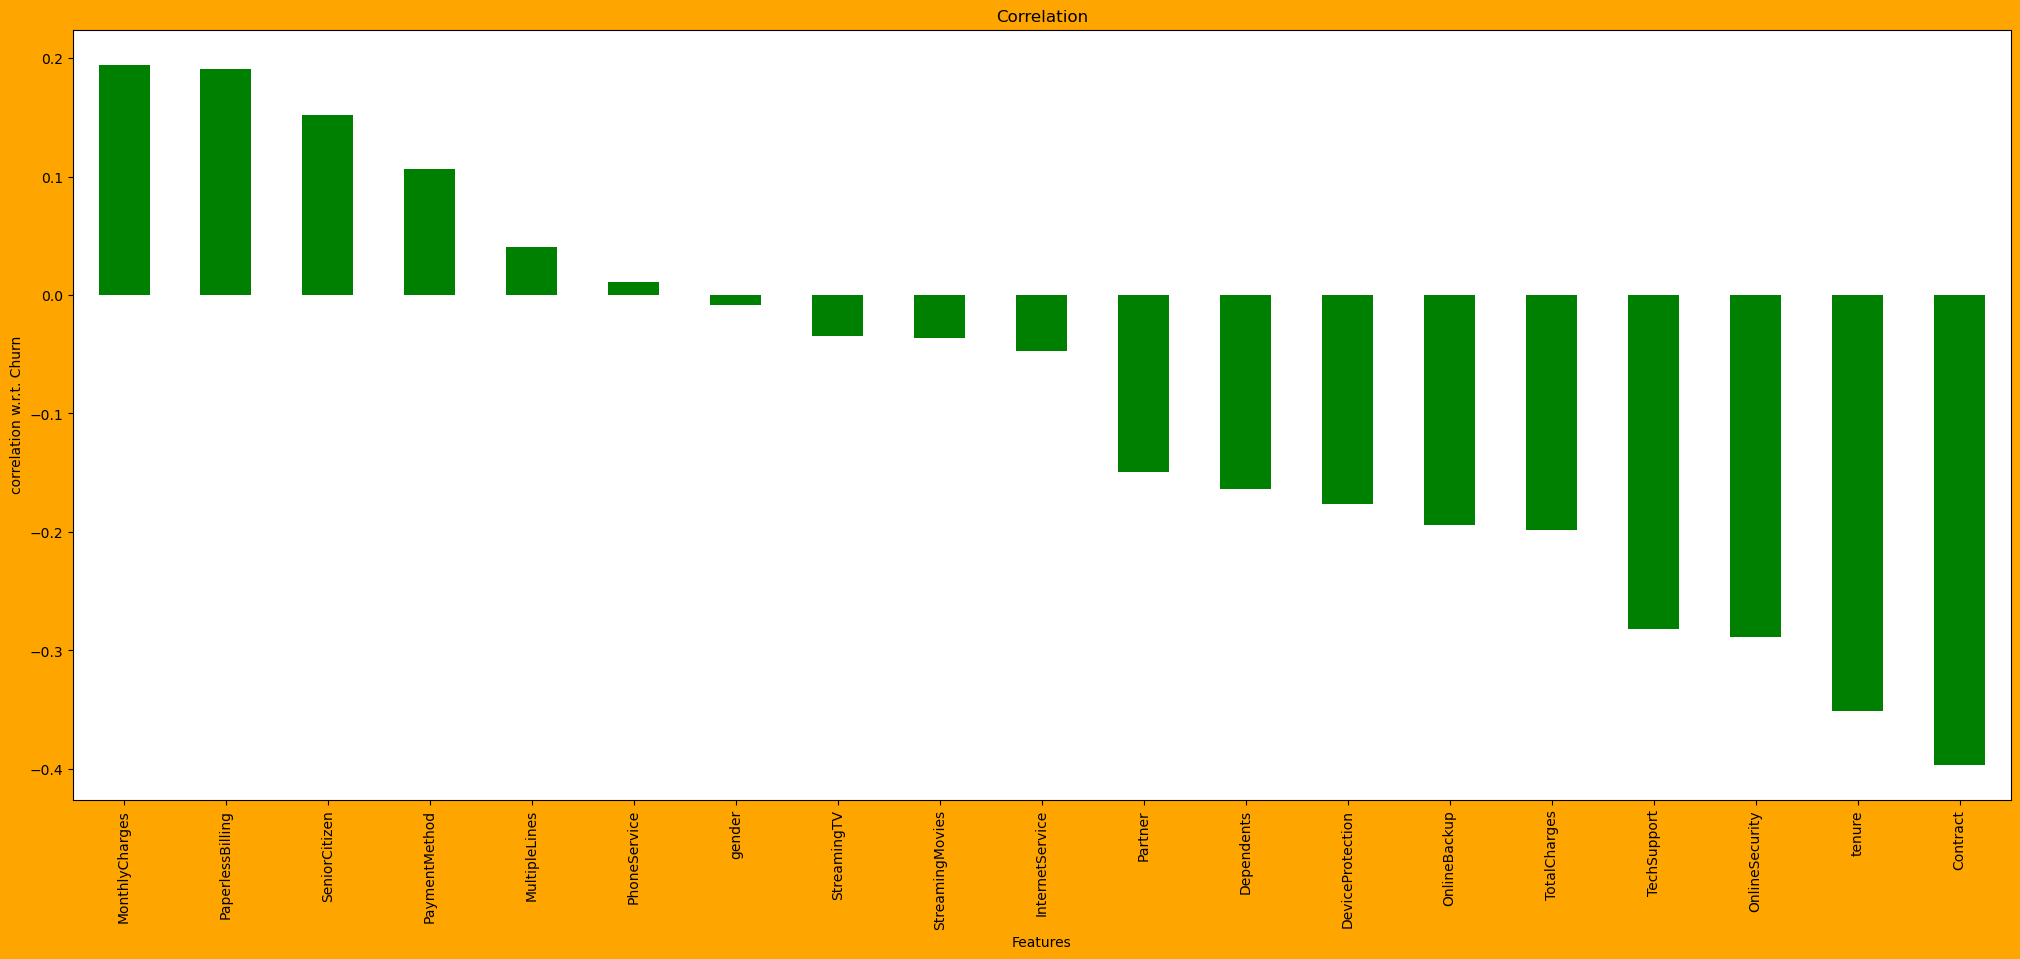

In [88]:
plt.figure(figsize =(25, 10),facecolor = 'orange')
df.corr()['Churn'].sort_values(ascending = False).drop(['Churn']).plot(kind ='bar', color ='green')
plt.xlabel('Features')
plt.ylabel('correlation w.r.t. Churn')
plt.title('Correlation')
plt.show()

In [89]:
#checking the skewness in dataset
df.skew()

gender             -0.017381
SeniorCitizen       1.829987
Partner             0.061857
Dependents          0.870322
tenure              0.235542
PhoneService       -2.721300
MultipleLines       0.112816
InternetService     0.208589
OnlineSecurity      0.416182
OnlineBackup        0.181338
DeviceProtection    0.185268
TechSupport         0.401511
StreamingTV         0.026366
StreamingMovies     0.012488
Contract            0.626004
PaperlessBilling   -0.377214
PaymentMethod      -0.166267
MonthlyCharges     -0.224097
TotalCharges        0.959073
Churn               1.068139
dtype: float64

Here Total Charges is the continuous column, Having skewness more than 0.5, so we need to fix the skewness in it

In [90]:
#Skew columns assigning to seperate list
Skew_col = ["TotalCharges"]

#importing power transformer library fro yeo johnson method
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')



In [91]:
df[Skew_col] = scaler.fit_transform(df[Skew_col].values)
df[Skew_col].head()

,TotalCharges
0,-1.821575
1,0.248190
2,-1.397519
3,0.227048
4,-1.260062


In [92]:
#checking the skewness in dataset
df.skew()

gender             -0.017381
SeniorCitizen       1.829987
Partner             0.061857
Dependents          0.870322
tenure              0.235542
PhoneService       -2.721300
MultipleLines       0.112816
InternetService     0.208589
OnlineSecurity      0.416182
OnlineBackup        0.181338
DeviceProtection    0.185268
TechSupport         0.401511
StreamingTV         0.026366
StreamingMovies     0.012488
Contract            0.626004
PaperlessBilling   -0.377214
PaymentMethod      -0.166267
MonthlyCharges     -0.224097
TotalCharges       -0.143826
Churn               1.068139
dtype: float64

Now the skewness is removed from our data

# Splitting the data into features and target

In [93]:
x = df.drop(['Churn'], axis=1)
y = df['Churn']

In [94]:
print(x.shape)
print(y.shape)

(7021, 19)
(7021,)


In [95]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [98]:
x_scaled

array([[-1.00872629, -0.44050836,  1.03140002, ...,  0.4021564 ,
        -1.16413536, -1.8215752 ],
       [ 0.9913492 , -0.44050836, -0.96955592, ...,  1.33896466,
        -0.26281076,  0.24819037],
       [ 0.9913492 , -0.44050836, -0.96955592, ...,  1.33896466,
        -0.36591432, -1.39751857],
       ...,
       [-1.00872629, -0.44050836,  1.03140002, ...,  0.4021564 ,
        -1.17245016, -0.86882942],
       [ 0.9913492 ,  2.27010445,  1.03140002, ...,  1.33896466,
         0.31756245, -0.93207538],
       [ 0.9913492 , -0.44050836, -0.96955592, ..., -1.47146012,
         1.35691277,  1.4846679 ]])

In [97]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(x_scaled, i) for i in range (x_scaled.shape[1])]

vif['features'] = x.columns


# Lets check the values 
vif

,vif,features
0,1.001693,gender
1,1.149525,SeniorCitizen
2,1.459014,Partner
3,1.383385,Dependents
4,10.687766,tenure
5,1.623008,PhoneService
6,1.394073,MultipleLines
7,1.860405,InternetService
8,1.252436,OnlineSecurity
9,1.188372,OnlineBackup


As the Total Charges is having high VIF score, lets remove the column and check for VIF again

In [99]:
x1 = x.drop(['TotalCharges'], axis=1)

In [103]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x1_scaled = scaler.fit_transform(x1)

In [104]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(x1_scaled, i) for i in range (x1_scaled.shape[1])]

vif['features'] = x1.columns


# Lets check the values 
vif

,vif,features
0,1.001693,gender
1,1.149452,SeniorCitizen
2,1.456924,Partner
3,1.381272,Dependents
4,2.741493,tenure
5,1.622879,PhoneService
6,1.388627,MultipleLines
7,1.820631,InternetService
8,1.247486,OnlineSecurity
9,1.185501,OnlineBackup


Now the VIF score is under 10 for all the features, So there is no multicollinearity

# Model Building

# Splitting the data for training and testing:

In [105]:
y.value_counts()

0.0    5164
1.0    1857
Name: Churn, dtype: int64

This is imbalanced data for the target column, so we have to balance the data first

# Balancing The Data

In [106]:
#importing smote library
from imblearn.over_sampling import SMOTE
sm=SMOTE()

In [107]:
#Applying SMOTE technique on DATa
X,Y=sm.fit_resample(x1,y)

X.shape, Y.shape

((10328, 18), (10328,))

In [108]:
Y.value_counts()

0.0    5164
1.0    5164
Name: Churn, dtype: int64

In [109]:
# Noiw the data is balanced

# Splitting the data for training and testing:

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [111]:
# To Find the best Random_state

maxaccu=0
maxRS=0

for i in range(0,200):
    X_train,X_test,Y_train,Y_test= train_test_split(X,Y,random_state=i,test_size=.20)
    LR= LogisticRegression()
    LR.fit(X_train,Y_train)
    pred= LR.predict(X_test)
    acc=accuracy_score(Y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)

Best accuracy is  0.7899322362052275 on Random State = 115


In [112]:
#selecting Random State 115

X_train,X_test,Y_train,Y_test= train_test_split(X,Y,random_state=115,test_size=.20)

In [113]:
#importing all reuired machine learning algorithm libraries
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [114]:
LR_model= LogisticRegression()
RD_model= RidgeClassifier()
DT_model= DecisionTreeClassifier()
SV_model= SVC()
KNR_model= KNeighborsClassifier()
RFR_model= RandomForestClassifier()
SGH_model= SGDClassifier()
Bag_model=BaggingClassifier()
ADA_model=AdaBoostClassifier()
GB_model= GradientBoostingClassifier()

model=[LR_model,RD_model,DT_model,SV_model,KNR_model,RFR_model,SGH_model,Bag_model,ADA_model,GB_model ]

In [115]:
#Trying different algorithms for training & testing
for i in model:
    i.fit(X_train,Y_train)
    i.score(X_train,Y_train)
    pred= i.predict(X_test)
    print('Accuracy_Score of ',i, 'is', accuracy_score(Y_test,pred)*100)
    print('Confusion Matrix of ',i,' is \n', confusion_matrix(Y_test,pred) )
    print(classification_report(Y_test,pred))
    print('=='*40)

Accuracy_Score of  LogisticRegression() is 78.99322362052274
Confusion Matrix of  LogisticRegression()  is 
 [[782 272]
 [162 850]]
              precision    recall  f1-score   support

         0.0       0.83      0.74      0.78      1054
         1.0       0.76      0.84      0.80      1012

    accuracy                           0.79      2066
   macro avg       0.79      0.79      0.79      2066
weighted avg       0.79      0.79      0.79      2066

Accuracy_Score of  RidgeClassifier() is 79.18683446272992
Confusion Matrix of  RidgeClassifier()  is 
 [[769 285]
 [145 867]]
              precision    recall  f1-score   support

         0.0       0.84      0.73      0.78      1054
         1.0       0.75      0.86      0.80      1012

    accuracy                           0.79      2066
   macro avg       0.80      0.79      0.79      2066
weighted avg       0.80      0.79      0.79      2066

Accuracy_Score of  DecisionTreeClassifier() is 80.59051306873185
Confusion Matrix of  De

Here Gradient classifier and Random Forest classifers are doing similarly, lets check CV

# CrossValidation

In [116]:
from sklearn.model_selection import cross_val_score

for i in model:
    print('Accuracy_Score of ',i, 'is', accuracy_score(Y_test,i.predict(X_test))*100)
    print("cross Validation accuracy score of ",i ," is ",cross_val_score(i,X,Y,cv=5, scoring='accuracy').mean()*100)
    print('=='*40)

Accuracy_Score of  LogisticRegression() is 78.99322362052274
cross Validation accuracy score of  LogisticRegression()  is  76.72367326178014
Accuracy_Score of  RidgeClassifier() is 79.18683446272992
cross Validation accuracy score of  RidgeClassifier()  is  76.45248682110217
Accuracy_Score of  DecisionTreeClassifier() is 80.59051306873185
cross Validation accuracy score of  DecisionTreeClassifier()  is  79.77479730632469
Accuracy_Score of  SVC() is 76.42787996127784
cross Validation accuracy score of  SVC()  is  74.82586509590298
Accuracy_Score of  KNeighborsClassifier() is 80.15488867376574
cross Validation accuracy score of  KNeighborsClassifier()  is  80.39335816365039
Accuracy_Score of  RandomForestClassifier() is 86.35043562439496
cross Validation accuracy score of  RandomForestClassifier()  is  84.31597945756148
Accuracy_Score of  SGDClassifier() is 75.26621490803484
cross Validation accuracy score of  SGDClassifier()  is  72.09607410654222
Accuracy_Score of  BaggingClassifier() 

Here the Random Forest and Gradient Boosting Classifers are doing best, we will go with RFClassifeir

# Hyper parameter tuning For RFClassifier

In [117]:
n_estimator= [200, 400]#, 600, 800, 1000]  # no of tree in Random forest, default is 100
max_features= ['auto','sqrt']#,'log2']  # no of features to create Decission Tree
max_depth=[10, 64, 118]#, 173, 227, 282, 336]  #  Max depth of decision tree
min_samples_split= [1,2,3]   # minimum  no of samples rerquired to split node
min_samples_leaf= [1,3,4]#,6,7,9]  #minimum no of samples required at each leaf node

param_grid= {'n_estimators': n_estimator,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             }
param_grid

{'n_estimators': [200, 400],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 64, 118],
 'min_samples_split': [1, 2, 3],
 'min_samples_leaf': [1, 3, 4]}

In [118]:
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(estimator=RFR_model,param_grid=param_grid,cv=5,n_jobs=-1,verbose=2)
grid_search.fit(X_train,Y_train)



Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 64, 118],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 3, 4],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [200, 400]},
             verbose=2)

In [119]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=118, n_estimators=200)

In [120]:
grid_search.best_params_

{'max_depth': 118,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [121]:
GCV_pred=grid_search.best_estimator_.predict(X_test)
accuracy_score(Y_test,GCV_pred)

0.8649564375605033

# ROC AUC Plot

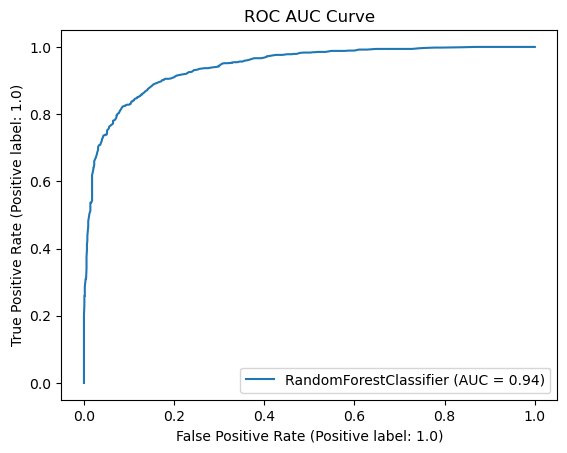

In [122]:
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve

plot_roc_curve(grid_search.best_estimator_,X_test,Y_test)
plt.title('ROC AUC Curve')
plt.show()

AUC 0.94 is a good one

# Saving the Model

In [123]:
import joblib
joblib.dump(grid_search.best_estimator_,"Telecom_Churn.pkl")

['Telecom_Churn.pkl']

# Testing/ Prediction

In [124]:
#Loading the saved model
GCV_pred=joblib.load("Telecom_Churn.pkl")

#Prediction
prediction = GCV_pred.predict(X_test)
prediction

array([0., 1., 0., ..., 0., 1., 0.])

In [125]:
pd.DataFrame([GCV_pred.predict(X_test)[:],Y_test[:]],index=["Predicted","Actual"])

,0,1,2,3,4,5,6,7,8,9,...,2056,2057,2058,2059,2060,2061,2062,2063,2064,2065
Predicted,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
Actual,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
